**Install Neurokit**

In [1]:
!pip install neurokit2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.1 MB/s eta 0:00:00


**Install required Libraries**

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

**ECG_simulator**

In [3]:
import numpy as np

def ecg_simulate(fs, signal_length, heart_rate, noise_level=0.0, artifact_type=None):
    # Time vector
    t = np.linspace(0, signal_length, int(signal_length * fs), endpoint=False)

    # Validate noise_level
    noise_level = np.clip(noise_level, 0.0, 1.0)

    # Initialize an empty synthetic ECG signal
    synthetic_ecg = np.zeros_like(t)

    # Simulate a clean ECG signal (you can modify this part)
    clean_ecg = 0.5 * np.sin(2 * np.pi * heart_rate / 60 * t)

    # Depending on the artifact_type, add noise or simulate specific artifacts
    if artifact_type == "BaselineWander":
        # Simulate baseline wander (example)
        baseline_wander = 0.05 * np.sin(2 * np.pi * 0.1 * t)
        synthetic_ecg = clean_ecg + baseline_wander
        label = "Noisy (Baseline Wander)"

    elif artifact_type == "MuscleArtifact":
        # Simulate muscle artifact (example)
        muscle_artifact = 0.3 * np.sin(2 * np.pi * 0.5 * t)
        synthetic_ecg = clean_ecg + muscle_artifact
        label = "Noisy (Muscle Artifact)"

    else:
        # No specific artifact, add random noise (example)
        max_noise_amplitude = 0.2  # Maximum noise amplitude (adjust as needed)
        random_noise = noise_level * max_noise_amplitude * np.random.normal(0, 1, size=t.shape)
        synthetic_ecg = clean_ecg + random_noise
        label = "Noisy (Random Noise)"

    return synthetic_ecg, label


**Function for generating Synthetic ECG Signals**

In [4]:
# Generate a synthetic dataset with labels
def generate_synthetic_dataset(num_samples):
    X = []
    y = []
    for _ in range(num_samples):
        # Randomly select parameters for the synthetic ECG
        fs = 250
        signal_length = 10
        heart_rate = np.random.uniform(40, 120)
        noise_level = np.random.uniform(0.1, 1.0)
        artifact_type = np.random.choice(['Clean', 'BaselineWander', 'MuscleArtifact'])

        # Generate synthetic ECG data
        synthetic_ecg, label = ecg_simulate(fs, signal_length, heart_rate, noise_level, artifact_type)

        X.append(synthetic_ecg)
        y.append(label)

    return np.array(X), np.array(y)

**Displaying the Generated Signals**

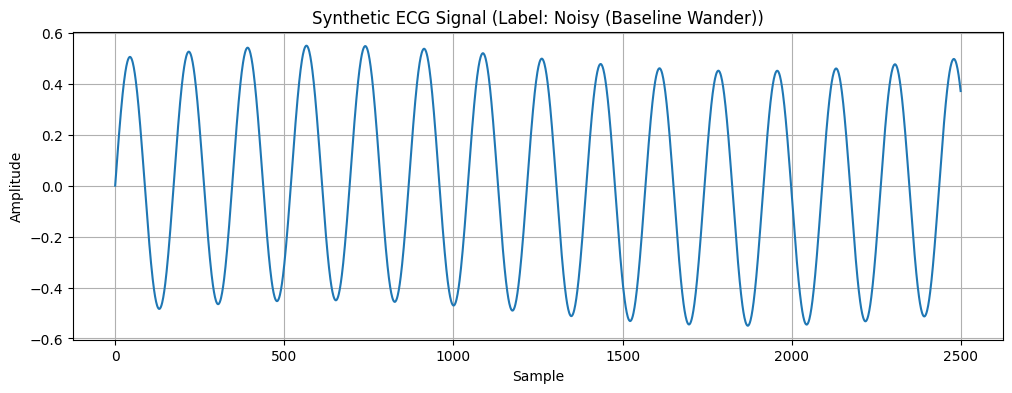

In [5]:
import matplotlib.pyplot as plt


num = 1
# Generate a synthetic dataset with labels
num_samples = num  # Number of synthetic ECG signals to generate
X, y = generate_synthetic_dataset(num_samples)

# Plot the synthetic ECG signals with labels
for i in range(num_samples):
    plt.figure(figsize=(12, 4))
    plt.plot(X[i])
    plt.title(f'Synthetic ECG Signal (Label: {y[i]})')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()


**Saving the Generated ECG signals in Binary files for futher use**

In [7]:
import numpy as np

# Specify the directory where you want to save the signals and labels
save_directory = "/content/output/"

# Generate a synthetic dataset with labels
num_samples = num  # Number of synthetic ECG signals to generate
X, y = generate_synthetic_dataset(num_samples)

# Save the synthetic ECG signals and labels as NumPy binary files
for i in range(num_samples):
    # Define a unique filename for each signal and label (you can customize this)
    signal_filename = f"synthetic_ecg_{i}.npy"
    label_filename = f"label_{i}.npy"

    # Combine the save_directory and filenames to create the full paths
    signal_full_path = save_directory + signal_filename
    label_full_path = save_directory + label_filename

    # Save the signal as a NumPy binary file
    np.save(signal_full_path, X[i])

    # Save the label as a separate NumPy binary file
    np.save(label_full_path, np.array([y[i]]))

    # Print a message to confirm the saves
    print(f'Saved {signal_filename} in {save_directory}')
    print(f'Saved {label_filename} in {save_directory}')


Saved synthetic_ecg_0.npy in /content/output/
Saved label_0.npy in /content/output/


**This code is Opening the generated Files and showing the signals in that file along with labels**

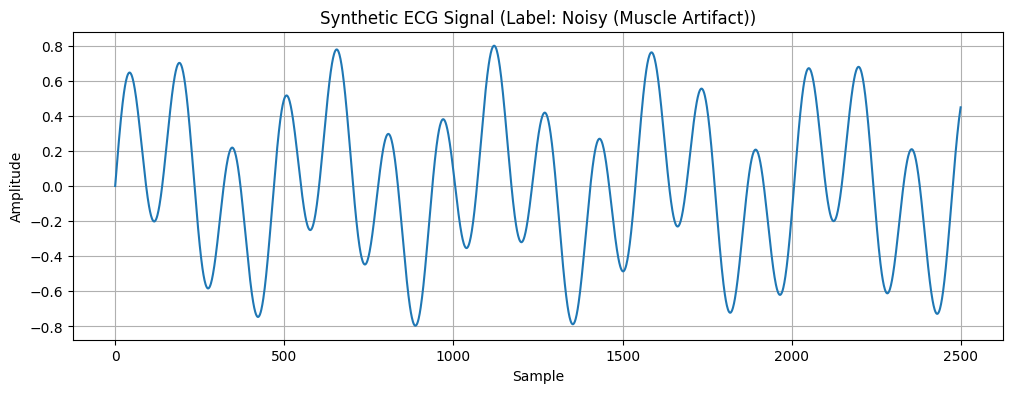

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Specify the directory where the signals and labels are saved
load_directory = "/content/output/"

# Load the synthetic ECG signals and labels
num_samples = num  # Number of synthetic ECG signals

X_loaded = []  # To store loaded signals
y_loaded = []  # To store loaded labels

for i in range(num_samples):
    # Define the filenames for signals and labels
    signal_filename = f"synthetic_ecg_{i}.npy"
    label_filename = f"label_{i}.npy"

    # Combine the load_directory and filenames to create the full paths
    signal_full_path = load_directory + signal_filename
    label_full_path = load_directory + label_filename

    # Load the signal and label from the respective files
    signal = np.load(signal_full_path)
    label = np.load(label_full_path)

    # Append the loaded signal and label to the lists
    X_loaded.append(signal)
    y_loaded.append(label[0])  # Extract the label from the 1D array

# Plot the loaded synthetic ECG signals with labels
for i in range(num_samples):
    plt.figure(figsize=(12, 4))
    plt.plot(X_loaded[i])
    plt.title(f'Synthetic ECG Signal (Label: {y_loaded[i]})')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()


**This code is showing the noisy and clean part of the signal**

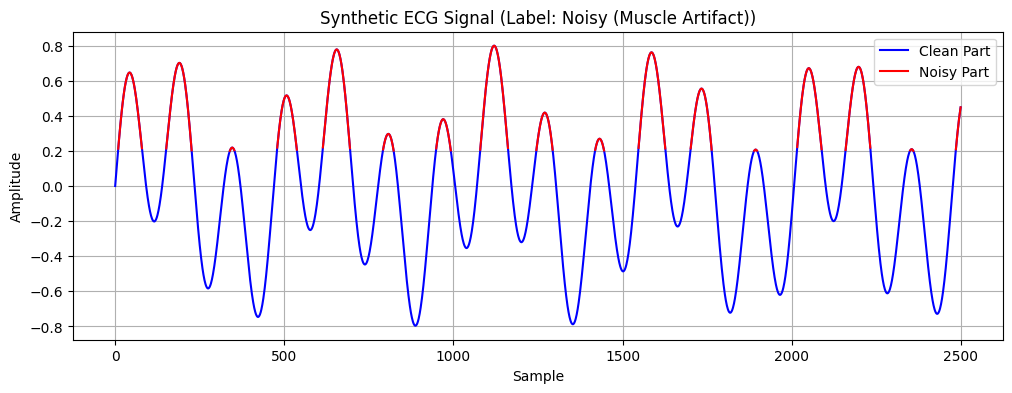

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Specify the directory where the signals and labels are saved
load_directory = "/content/output/"

# Load the synthetic ECG signals and labels
num_samples = num  # Number of synthetic ECG signals

X_loaded = []  # To store loaded signals
y_loaded = []  # To store loaded labels

for i in range(num_samples):
    # Define the filenames for signals and labels
    signal_filename = f"synthetic_ecg_{i}.npy"
    label_filename = f"label_{i}.npy"

    # Combine the load_directory and filenames to create the full paths
    signal_full_path = load_directory + signal_filename
    label_full_path = load_directory + label_filename

    # Load the signal and label from the respective files
    signal = np.load(signal_full_path)
    label = np.load(label_full_path)

    # Append the loaded signal and label to the lists
    X_loaded.append(signal)
    y_loaded.append(label[0])  # Extract the label from the 1D array

# Plot the loaded synthetic ECG signals with clean and noisy parts in the same figure
for i in range(num_samples):
    plt.figure(figsize=(12, 4))

    # Plot the clean part of the signal in blue
    plt.plot(X_loaded[i], label='Clean Part', color='blue')

    # Identify the noisy part of the signal by thresholding (adjust the threshold as needed)
    noisy_threshold = 0.2
    noisy_part = np.where(X_loaded[i] > noisy_threshold, X_loaded[i], np.nan)

    # Plot the noisy part of the signal in red
    plt.plot(noisy_part, label='Noisy Part', color='red')

    plt.title(f'Synthetic ECG Signal (Label: {y_loaded[i]})')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()
    plt.show()


Enter the path to the signal file: /content/output/synthetic_ecg_0.npy


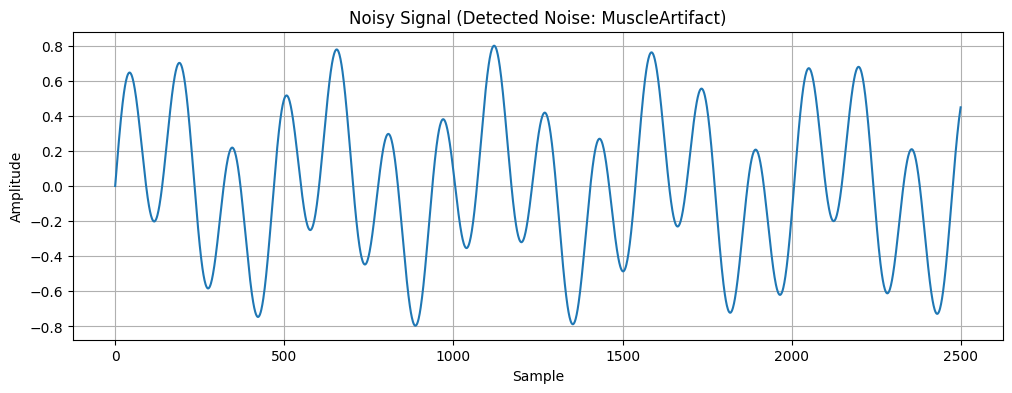

Signal Status: MuscleArtifact


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Function to automatically analyze and classify the signal
def analyze_signal(file_path):
    try:
        # Load the signal from the selected file
        signal = np.load(file_path)

        # Initialize noise_type with a default value
        noise_type = "Clean"

        # Determine if the signal is noisy or clean based on signal characteristics
        signal_amplitude_range = np.max(signal) - np.min(signal)
        signal_power = np.sum(signal ** 2)

        # Define detection thresholds based on signal characteristics
        baseline_wander_threshold = 0.1  # Adjust the threshold for BaselineWander detection
        muscle_artifact_threshold = 0.3   # Adjust the threshold for MuscleArtifact detection

        # Apply thresholding to detect noise types
        if signal_amplitude_range > baseline_wander_threshold:
            noise_type = "BaselineWander"
        elif signal_power > muscle_artifact_threshold:
            noise_type = "MuscleArtifact"
        else:
            noise_type = "Clean"

        # Visualize the signal
        plt.figure(figsize=(12, 4))
        plt.plot(signal)
        plt.title(f'Noisy Signal (Detected Noise: {noise_type})')
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.show()

        return noise_type

    except Exception as e:
        return f"Error: {str(e)}"

# Function to handle file upload
def upload_file():
    file_path = input("Enter the path to the signal file: ")
    if file_path:
        noise_type = analyze_signal(file_path)
        print(f"Signal Status: {noise_type}")

# Call the upload_file function to start the analysis
upload_file()


In [ ]:
# Split the dataset into training and test sets
X, y = generate_synthetic_dataset(num_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train a machine learning model (Random Forest classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# Visualize synthetic ECG signals (optional)
# You can plot the generated ECG signals to visualize different noise and artifact scenarios.
# Modify the code to suit your visualization needs.
# Example: plt.plot(X[0])

# You can further customize, optimize, and expand this code to meet your specific requirements.


Accuracy: 1.0
Classification Report:
                          precision    recall  f1-score   support

Noisy (Baseline Wander)       1.00      1.00      1.00       131
Noisy (Muscle Artifact)       1.00      1.00      1.00       119
   Noisy (Random Noise)       1.00      1.00      1.00       150

               accuracy                           1.00       400
              macro avg       1.00      1.00      1.00       400
           weighted avg       1.00      1.00      1.00       400

